# Install packages

In [ ]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive") 
!pip install neo
!pip install matplotlib_scalebar
!pip install ffmpeg
!pip install Ipython --upgrade
!pip3 install setuptools==65.5.0
%load_ext autoreload
%autoreload 2

# Import packages

In [4]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    %cd ..
    from add_path import find_path
    current_path = find_path()
    %cd $current_path
    
import sys
from data_wrangling import basic_func, process_raw_data, base_processing_class, monkey_data_classes, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis, patterns_and_features_class, compare_two_monkeys_class, monkey_landing_in_ff
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.compare_GUAT_and_TAFT import find_GUAT_or_TAFT_trials
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, process_GUAT_trials_class, GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curvature_class, curv_of_traj_utils
from machine_learning import machine_learning_utils, hyperparameter_tuning_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data_utils
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from visualization import plot_trials, animation_func, plot_behaviors_utils, monkey_heading_functions, plot_statistics, plot_change_over_time
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_scatterplot, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from non_behavioral_analysis import neural_data_processing
from non_behavioral_analysis.planning_neural import planning_neural_class
from planning_analysis.only_stop_ff import only_stop_ff_utils, only_stop_ff_class, only_stop_ff_utils
from planning_analysis.plan_factors import plan_factors_utils, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.agent_analysis import compare_monkey_and_agent_utils, agent_plan_factors_class, agent_plan_factors_x_sess_class
from planning_analysis.plan_factors import test_vs_control_utils
from planning_analysis.variations_of_factors_vs_results import make_variations_utils, plot_variations_utils, process_variations_utils
from planning_analysis.show_planning import alt_ff_utils, show_planning_class, show_planning_utils, examine_null_arcs
from planning_analysis.show_planning.get_stops_near_ff import find_stops_near_ff_class, find_stops_near_ff_utils, plot_stops_near_ff_class, plot_stops_near_ff_utils, plot_monkey_heading_helper_class, stops_near_ff_based_on_ref_class
from planning_analysis import ml_methods_class, ml_methods_utils
from scipy.stats import pearsonr

from importlib import reload
from non_behavioral_analysis import eye_positions
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from non_behavioral_analysis import neural_analysis


plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/notebooks
Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.
/Users/dusiyi/Documents/Multifirefly-Project


# Retrieve individual monkey data

In [432]:
path = '/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/processed_data'
# iterate over all subdirectories in path and delete everything except monkey_information.csv
for root, dirs, files in os.walk(path):
    for file in files:
        if file != 'monkey_information.csv':
            #os.remove(os.path.join(root, file))
            print(os.path.join(root, file))

/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/processed_data/.DS_Store
/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/processed_data/individual_monkey_data/.DS_Store
/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/.DS_Store
/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/processed_data/individual_monkey_data/monkey_Schro/.DS_Store


In [438]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/individual_monkey_data/monkey_Schro/data_0321"
data_item = monkey_data_classes.ProcessMonkeyData(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
# data_item.find_patterns()
# data_item.make_or_retrieve_all_trial_patterns(exists_ok=True)
# data_item.make_or_retrieve_pattern_frequencies(exists_ok=True)
# data_item.make_or_retrieve_all_trial_features(exists_ok=True)
# data_item.make_or_retrieve_feature_statistics(exists_ok=True)
# data_item.make_info_of_monkey()
# data_item.make_or_retrieve_target_closest()
# data_item.make_or_retrieve_target_angle_smallest()
# data_item.make_distance_dataframe()
# data_item.make_angle_dataframe()

# monkey_information = data_item.monkey_information
# target_closest = data_item.target_closest
# target_angle_smallest = data_item.target_angle_smallest
# ff_dataframe = data_item.ff_dataframe

# ff_life_sorted = data_item.ff_life_sorted
# ff_real_position_sorted = data_item.ff_real_position_sorted
# ff_believed_position_sorted = data_item.ff_believed_position_sorted
# cluster_around_target_indices = data_item.cluster_around_target_indices
# ff_caught_T_new = data_item.ff_caught_T_new
# ff_flash_sorted = data_item.ff_flash_sorted

# all_trial_patterns = data_item.all_trial_patterns
# all_trial_features = data_item.all_trial_features
# pattern_frequencies = data_item.pattern_frequencies
# feature_statistics = data_item.feature_statistics
# info_of_monkey = data_item.info_of_monkey
# distance_dataframe = data_item.distance_dataframe
# angle_dataframe = data_item.angle_dataframe
# trial_vs_distance = data_item.trial_vs_distance
# trial_vs_angle = data_item.trial_vs_angle

Retrieved monkey data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Schro/data_0321/monkey_information.csv  and ff data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Schro/data_0321/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from  all_monkey_data/processed_data/individual_monkey_data/monkey_Schro/data_0321/ff_dataframe.h5


# Add scatteredness to feature

In [439]:
curv_of_traj_mode = 'cum_distance'
window_for_curv_of_traj=[-25, 25]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/individual_monkey_data/monkey_Bruno/data_0314"
pf = plan_factors_class.PlanFactors(raw_data_folder_path=raw_data_folder_path)
pf.get_more_monkey_data()

Failed to retrieve monkey data. Will make new monkey data. Error:  [Errno 2] No such file or directory: 'all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_basic_info.npz'
Retrieved monkey_information
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Failed to retrieve ff_dataframe. Will make new ff_dataframe. Error:  File all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_dataframe.h5 does not exist
Making ff_dataframe:  100  out of  1334  total number of fireflies 
Making ff_dataframe:  200  out of  1334  total number of fireflies 
Making ff_dataframe:  300  out of  1334  total number of fireflies 
Making ff_dataframe:  400  out of  1334  total number of fireflies 
Making ff_dataframe:  500  out of  1334  total number of fireflies 
Making ff_dataframe:  600  out of  1334  total number of fireflies 
Making ff_dataframe:  700  out of  1334  total number of fireflies 
Making ff_dataframe:  800  out of  1334  total number 

61 out of 953 are not within 25 cm of ff center, which is 6.40%. These are excluded


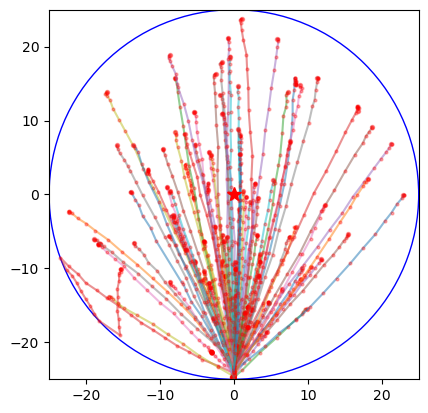

,distance_mean,distance_std,distance_25%,distance_50%,distance_75%,distance_iqr,angle_mean,angle_std,angle_25%,angle_50%,...,abs_angle_mean,abs_angle_std,abs_angle_25%,abs_angle_50%,abs_angle_75%,abs_angle_iqr,Q1_perc,Q2_perc,Q3_perc,Q4_perc
0,12.98700,5.64830,8.83564,13.05802,17.15251,8.31687,-20.88138,127.26348,-145.74059,-50.60836,...,117.18865,53.70217,72.64105,135.05458,165.55947,92.91841,17.37668,14.79821,27.01794,40.80717


In [440]:
scatter_around_target_center_df = monkey_landing_in_ff.make_scatter_around_target_center_df(pf.monkey_information, pf.closest_stop_to_capture_df, pf.ff_real_position_sorted)
scatter_around_target_center_df

In [ ]:
# now, get scatter_around_target_center_df for every data session
monkey_name = 'Schro'
schro = patterns_and_features_class.PatternsAndFeatures(monkey_name='monkey_Schro')
schro.make_combd_scatter_around_target_center_df(exists_ok=False)

In [ ]:
# now, get scatter_around_target_center_df for every data session
monkey_name = 'Bruno'
bruno = patterns_and_features_class.PatternsAndFeatures(monkey_name='monkey_Bruno')
bruno.make_combd_scatter_around_target_center_df(exists_ok=False)

In [ ]:
bruno.combd_scatter_around_target_center_df.columns

In [ ]:
y_columns = ['distance_mean', 'distance_25%', 'distance_50%',
            'distance_75%']
schro.plot_the_changes_in_scatter_around_target_center_df_over_time(y_columns=y_columns)

y_columns = ['abs_angle_mean',
            'abs_angle_25%', 'abs_angle_50%', 'abs_angle_75%']
schro.plot_the_changes_in_scatter_around_target_center_df_over_time(y_columns=y_columns)

In [ ]:
schro.plot_the_changes_in_scatter_around_target_center_df_over_time()

# Success Rate Comparison

## get data

In [ ]:
bruno = patterns_and_features_class.PatternsAndFeatures(monkey_name='monkey_Bruno')
bruno.combine_patterns_and_features(verbose=False)

In [ ]:
schro = patterns_and_features_class.PatternsAndFeatures(monkey_name='monkey_Schro')
schro.combine_patterns_and_features(verbose=False)

In [ ]:
# Bruno
sub1 = bruno.agg_pattern_frequencies[bruno.agg_pattern_frequencies['Item'].isin(['ff_capture_rate', 'stop_success_rate'])].copy()
sub1 = sub1[['Frequency', 'Label', 'Rate']].reset_index(drop=True).rename(columns={'Frequency': 'Total Captured FF'})

In [ ]:
# Schro
sub2 = schro.agg_pattern_frequencies[schro.agg_pattern_frequencies['Item'].isin(['ff_capture_rate', 'stop_success_rate'])].copy()
sub2 = sub2[['Frequency', 'Label', 'Rate']].reset_index(drop=True).rename(columns={'Frequency': 'Total Captured FF'})

In [ ]:
## Combine them
sub1['Monkey'] = 'Bruno'
sub2['Monkey'] = 'Schro'

both_sub = pd.concat([sub1, sub2], axis=0).reset_index(drop=True)


In [ ]:
both_sub = both_sub.melt(id_vars=['Monkey', 'Label'], value_vars=['Rate']).sort_values(by=['Label', 'Monkey']).drop(columns=['variable']).reset_index(drop=True)

In [ ]:
both_sub = both_sub.rename(columns={'Label': 'statistic'})

## plot comparison

In [ ]:
import plotly.express as px

# make a barplot out of both_sub
# change the width of the fig
fig = px.bar(both_sub, x='statistic', y='value', color='Monkey', barmode='group', text='value', title='FF Capture Rate and Stop Success Rate', width=500)  # Adjust the width as needed

# make the text only 3 decimal
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

# increase y lim a little bit to make sure no text is blocked
fig.update_yaxes(range=[0, max(both_sub['value']) + 0.1])

# Show the figure
fig.show()

## compare single-ff success rate

In [ ]:
single_ff = pd.DataFrame({'Bruno': [0.514, 0.570], 'Schro': [0.454, 0.475]}, index=['Mean', 'Median']).reset_index(drop=False).rename(columns={'index': 'statistic'})
single_ff = single_ff.melt(id_vars=['statistic'], value_vars=['Bruno', 'Schro'])
single_ff = single_ff.sort_values(by=['statistic']).reset_index(drop=True).rename(columns={'variable': 'monkey'})

In [ ]:
single_ff

In [ ]:
import plotly.express as px

# make a barplot out of both_sub
# change the width of the fig
fig = px.bar(single_ff, x='statistic', y='value', color='monkey', barmode='group', text='value', title='Mean and Median Success Ratee', width=500)  # Adjust the width as needed

# make the text only 3 decimal
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

# increase y lim a little bit to make sure no text is blocked
fig.update_yaxes(range=[0, max(both_sub['value']) + 0.1])

# Show the figure
fig.show()

# Individual monkey patterns and statistics data

## get data

In [ ]:
monkey_name = 'Bruno'
bruno = patterns_and_features_class.PatternsAndFeatures(monkey_name='monkey_Bruno')
bruno.combine_patterns_and_features(verbose=False)

agg_pattern_frequencies = bruno.agg_pattern_frequencies.copy()
agg_feature_statistics = bruno.agg_feature_statistics.copy()
combd_pattern_frequencies = bruno.combd_pattern_frequencies.copy()
combd_feature_statistics = bruno.combd_feature_statistics.copy()
combd_all_trial_features = bruno.combd_all_trial_features.copy()

In [ ]:
monkey_name = 'Schro'
schro = patterns_and_features_class.PatternsAndFeatures(monkey_name='monkey_Schro')
schro.combine_patterns_and_features(verbose=False)

agg_pattern_frequencies = schro.agg_pattern_frequencies.copy()
agg_feature_statistics = schro.agg_feature_statistics.copy()
combd_pattern_frequencies = schro.combd_pattern_frequencies.copy()
combd_feature_statistics = schro.combd_feature_statistics.copy()
combd_all_trial_features = schro.combd_all_trial_features.copy()

## plot pattern_frequencies

In [ ]:
bruno.plot_pattern_frequencies()

In [ ]:
schro.plot_pattern_frequencies()

## plot_statistics.plot_feature_statistics

In [ ]:
bruno.plot_feature_statistics()

In [ ]:
schro.plot_feature_statistics()

## changes over time


### patterns

In [ ]:
bruno.plot_the_changes_in_pattern_frequencies_over_time()

### features

In [ ]:
bruno.plot_the_changes_in_feature_statistics_over_time()

# Bruno vs Schro

In [ ]:
tm = compare_two_monkeys_class.CompareTwoMonkeys()

### plot patterns

In [ ]:
tm.plot_pattern_frequencies()

### plot features

In [ ]:
tm.plot_feature_statistics()

### changes over time

#### patterns

In [ ]:
tm.plot_the_changes_in_pattern_frequencies_over_time()

#### features

In [ ]:
tm.plot_the_changes_in_feature_statistics_over_time()

# Plots of statistics

## Plot all_trial_features in box plots

In [ ]:
all_trial_features = combd_all_trial_features

In [ ]:
columns_of_interest = ['t', 't_last_vis', 'd_last_vis','abs_angle_last_vis', 'num_stops', 'num_stops_near_target']
titles_of_columns = {'t': 'Trial Duration',
                     't_last_vis': 'Trial Duration Since Target Last Visible',
                     'd_last_vis':'Distance of Target Since Target Last Visible',
                     'abs_angle_last_vis': 'Abs Angle of Target Boundary Since Target Last Visible',
                     'num_stops': 'Number of Stops during a Trial',
                     'num_stops_near_target': 'Number of Stops near a Target',
}
x_lables_of_columns = {'t': 'Duration in s',
                      't_last_vis': 'Duration in s',
                      'd_last_vis':'cum_distance',
                      'abs_angle_last_vis': 'Angle in radians',
                      'num_stops': 'Number of Stops',
                      'num_stops_near_target': 'Number of Stops'}

for column in columns_of_interest:
    feature_data = all_trial_features[column]
    title = titles_of_columns[column]
    x_label = x_lables_of_columns[column]
    feature_data = feature_data[feature_data!=9999]
    sns.boxplot(x=feature_data)
    plt.title(title, fontsize=15)
    plt.xlabel(x_label)
    plt.show()

In [ ]:
plot_statistics.plot_num_stops_in_histogram(all_trial_features, 'num_stops')
plt.title('Number of Stops During a Trial')
plt.show()


In [ ]:
plot_statistics.plot_num_stops_in_histogram(all_trial_features, 'num_stops_since_last_vis')
plt.title('Number of Stops Since Target Last Visible')
plt.show()


## Num stops & non stops since target last visible

In [ ]:
combd_pattern_frequencies['Percentage'] = combd_pattern_frequencies['Rate']*100

In [ ]:
#plot_statistics.plot_num_ff_caught_in_a_row_in_barplot(pattern_frequencies, show_one_in_a_row = False)
plot_statistics.plot_num_ff_caught_in_a_row_in_barplot(combd_pattern_frequencies, show_one_in_a_row = False)

In [ ]:
#plot_statistics.plot_num_ff_caught_in_a_row_in_pie_chart(pattern_frequencies)
plot_statistics.plot_num_ff_caught_in_a_row_in_pie_chart(agg_pattern_frequencies)

## Num ffs around target

In [ ]:
#plot_statistics.plot_num_ff_around_target_in_barplot(all_trial_features)
plot_statistics.plot_num_ff_around_target_in_barplot(combd_all_trial_features)

## Num stops near target

In [ ]:
plot_statistics.plot_num_stops_near_target_in_barplot(all_trial_features)

## Target closest & target_angle_smallest

In [ ]:
# plot_statistics.plot_proportion_of_target_closest(target_closest)

In [ ]:
# plot_statistics.plot_proportion_of_target_closest(target_closest)
# plot_statistics.plot_proportion_of_target_angle_smallest(target_angle_smallest)

## Number of ffs

Number of visible ffs at any point

In [ ]:
plot_statistics.plot_number_of_visible_ff_per_point_in_histogram(data_item.ff_dataframe)

Number of ffs in memory at any point

In [ ]:
plot_statistics.plot_number_of_ff_in_memory_per_point_in_histogram(data_item.ff_dataframe)

# Numbers of stops vs. Cum_distance/Distance/Time 

Cum_distance: Integrate the speed of the monkey during the trial. 

Distance: Find the absolute distance between two targets. Discard the trials where the monkey has gone to a border

## Retrieve data

In [5]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/individual_monkey_data/monkey_Bruno/data_0314"
data_item = monkey_data_classes.ProcessMonkeyData(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)

data_item.find_patterns()
data_item.make_PlotTrials_args()

Retrieved monkey data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/monkey_information.csv  and ff data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_dataframe.h5
412 clusters out of 549 are too close to the target or the last target
The number of new trials that are used to separate stop clusters is 953


## whole trial

In [6]:
cum_distance_array = []
distance_array = []
for i in range(len(data_item.ff_caught_T_new)-1):
  cum_distance_array.append(basic_func.get_cum_distance_traveled(i, data_item.ff_caught_T_new, data_item.monkey_information))
  distance_array.append(basic_func.get_distance_between_two_points(i, data_item.ff_caught_T_new, data_item.monkey_information, data_item.ff_believed_position_sorted))
cum_distance_array = np.array(cum_distance_array)
distance_array = np.array(distance_array)
distance_df = pd.DataFrame({'cum_distance': cum_distance_array, 'distance': distance_array})
distance_df['trial'] = np.arange(len(distance_df))

In [16]:
num_stops_df = alt_ff_utils.drop_rows_where_stop_is_not_inside_reward_boundary(data_item.closest_stop_to_capture_df)
num_stops_df = num_stops_df.rename(columns={'time': 'stop_time',
                                                'stop_ff_index': 'trial'})
num_stops_df['num_stops'] = organize_patterns_and_features.get_num_stops_array(data_item.monkey_information, 
                                                                              num_stops_df['trial'].values)

num_stops_df['current_capture_time'] = data_item.ff_caught_T_new[num_stops_df['trial']]
num_stops_df['prev_capture_time'] = data_item.ff_caught_T_new[num_stops_df['trial'] - 1]

# Add distance information
num_stops_df = num_stops_df.merge(distance_df, on='trial', how='left').dropna()

# # Filter out the outliers
# original_length = len(num_stops_df)
# num_stops_df = num_stops_df[(num_stops_df['distance'] < 2000) & (num_stops_df['cum_distance'] < 2000)]
# print(f'Filtered out {original_length - len(num_stops_df)} outliers out of {original_length} trials, since they have distance ' + 
#       f'or displacement greater than 2000, which is {round(100*(original_length - len(num_stops_df))/original_length, 2)}% of the data')

61 rows out of 953 rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, 


coefficient of determination: 0.35267497858182434


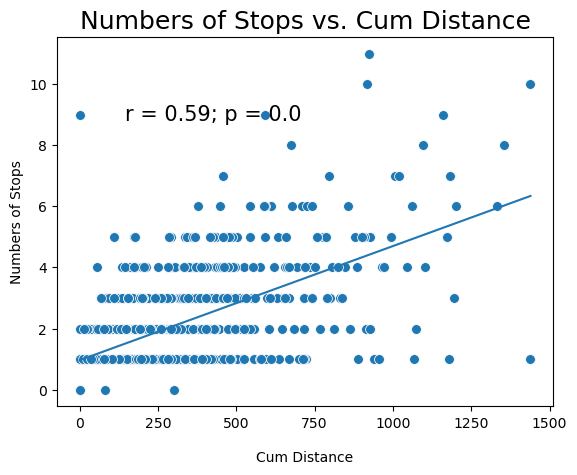

coefficient of determination: 0.16926317817662775


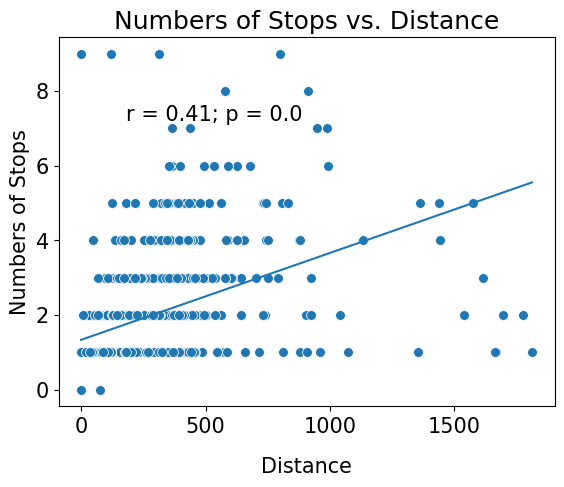

In [17]:
#sns.regplot(sub_df2, x='cum_distance', y='num_stops', scatter_kws={'alpha':0.5})
num_stops_df2 = num_stops_df[(num_stops_df['cum_distance'] < 2000)].copy()
plot_statistics.fit_and_plot_linear_regression(num_stops_df2['cum_distance'].values, num_stops_df2['num_stops'].values, show_regression = True)
plt.title('Numbers of Stops vs. Cum Distance')
plt.xlabel('Cum Distance', labelpad=15)
plt.ylabel('Numbers of Stops')
plt.show()

#sns.regplot(sub_df2, x='cum_distance', y='num_stops', scatter_kws={'alpha':0.5})
num_stops_df3 = num_stops_df[(num_stops_df['distance'] < 2000)].copy()
plot_statistics.fit_and_plot_linear_regression(num_stops_df3['distance'].values, num_stops_df3['num_stops'].values, show_regression = True)
plt.title('Numbers of Stops vs. Distance')
plt.xlabel('Distance', labelpad=15)
plt.ylabel('Numbers of Stops')
plt.show()


coefficient of determination: 0.3029757107824775


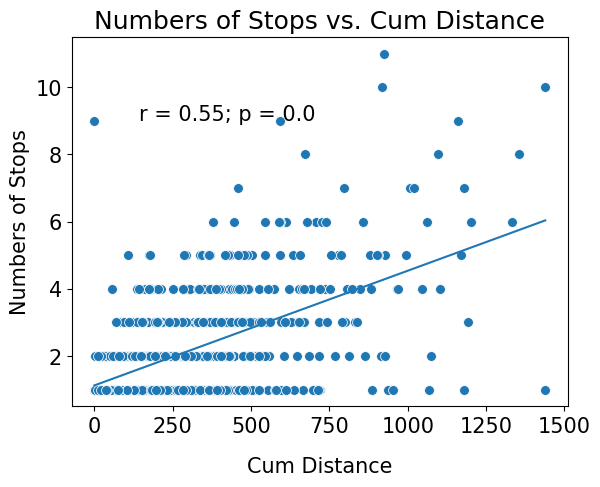

coefficient of determination: 0.12262789226518807


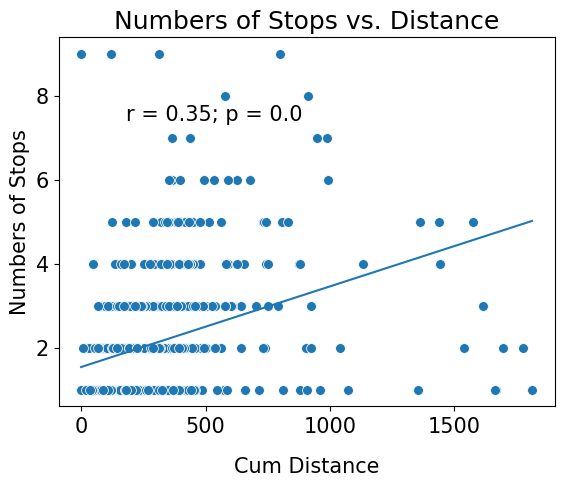

In [18]:
sub_df2 = num_stops_df2[num_stops_df2['num_stops'] > 0].copy()
#sns.regplot(sub_df2, x='cum_distance', y='num_stops', scatter_kws={'alpha':0.5})
plot_statistics.fit_and_plot_linear_regression(sub_df2['cum_distance'].values, sub_df2['num_stops'].values, show_regression = True)
plt.title('Numbers of Stops vs. Cum Distance')
plt.xlabel('Cum Distance', labelpad=15)
plt.ylabel('Numbers of Stops')
plt.show()

sub_df3 = num_stops_df3[num_stops_df3['num_stops'] > 0].copy()
#sns.regplot(sub_df2, x='cum_distance', y='num_stops', scatter_kws={'alpha':0.5})
plot_statistics.fit_and_plot_linear_regression(sub_df3['distance'].values, sub_df3['num_stops'].values, show_regression = True)
plt.title('Numbers of Stops vs. Distance')
plt.xlabel('Cum Distance', labelpad=15)
plt.ylabel('Numbers of Stops')
plt.show()


## since last visible

In [7]:
visible_ff = data_item.ff_dataframe[data_item.ff_dataframe['visible'] == 1].copy()
data_item.make_or_retrieve_target_cluster_df(exists_ok=True)
target_clust_last_vis_df = data_item.target_cluster_df.copy()
target_last_vis_df = cluster_analysis.get_target_last_vis_df(data_item.ff_dataframe, data_item.monkey_information, data_item.ff_caught_T_new, data_item.ff_real_position_sorted)

Retrieved target_cluster_df


In [8]:
max_cluster_distance = 75
target_clust_last_vis_df = data_item.target_cluster_df

num_stops = organize_patterns_and_features.get_num_stops_array(data_item.monkey_information, 
                                                                np.arange(len(data_item.ff_caught_T_new)))

num_stops_since_last_vis = organize_patterns_and_features._calculate_num_stops_since_last_vis(data_item.monkey_information, 
                                                                                                      len(data_item.ff_caught_T_new), 
                                                                                                      target_clust_last_vis_df['time_since_last_vis'].values)

num_stops_near_target = organize_patterns_and_features._calculate_num_stops_near_target(data_item.monkey_information, data_item.ff_caught_T_new,
                                                                                        data_item.ff_real_position_sorted, max_cluster_distance)

The number of new trials that are used to separate stop clusters is 953


In [9]:

def add_num_stops_to_target_last_vis_df(target_last_vis_df, num_stops, num_stops_near_target, num_stops_since_last_vis):
    all_trial_df = pd.DataFrame({'target_index': np.arange(len(data_item.ff_caught_T_new))})
    target_last_vis_df = target_last_vis_df.merge(all_trial_df, on='target_index', how='right')

    target_last_vis_df.sort_values(by='target_index', inplace=True)
    target_last_vis_df['num_stops'] = num_stops
    target_last_vis_df['num_stops_near_target'] = num_stops_near_target
    target_last_vis_df['num_stops_since_last_vis'] = num_stops_since_last_vis
    target_last_vis_df.dropna(inplace=True)
    target_last_vis_df = target_last_vis_df[target_last_vis_df['last_vis_dist'] != 9999]
    return target_last_vis_df

In [10]:
target_clust_last_vis_df = add_num_stops_to_target_last_vis_df(target_clust_last_vis_df, num_stops, num_stops_near_target, num_stops_since_last_vis)
target_last_vis_df = add_num_stops_to_target_last_vis_df(target_last_vis_df, num_stops, num_stops_near_target, num_stops_since_last_vis)

In [12]:
def plot_relationships_between_last_seen_info_and_num_stops(last_vis_df):
    for y_column in ['num_stops', 'num_stops_near_target', 'num_stops_since_last_vis']:
        for x_column in ['time_since_last_vis', 'last_vis_dist', 'last_vis_cum_dist',
                        'last_vis_ang', 'last_vis_ang_to_bndry', 'last_vis_target_dist',
                        'last_vis_target_ang', 'last_vis_target_ang_to_bndry',
                        'abs_last_vis_ang', 'abs_last_vis_ang_to_bndry',
                        'abs_last_vis_target_ang', 'abs_last_vis_target_ang_to_bndry']:
            if x_column in last_vis_df.columns:
                #plot_statistics.fit_and_plot_linear_regression(target_cluster_df2[x_column].values, target_cluster_df2['num_stops'].values, show_regression = True)
                r, p = pearsonr(last_vis_df[x_column], last_vis_df[y_column])
                if p > 0.05:
                    print(f'P-value for {x_column} and {y_column} is {p}. Plot skipped.')
                    continue

                sns.regplot(last_vis_df, x=x_column, y=y_column, scatter_kws={'color': 'blue', 'alpha': 0.05},
                            x_jitter=0.1, y_jitter=0.1)
                
                # Annotate the plot with the Pearson correlation coefficient
                plt.annotate(f'Pearson r: {r:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

                # Also annotate with the p-value
                plt.annotate(f'p-value: {p:.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')

                #plt.title('Number of Stops vs. Distance of Target Since Last Visible')
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.show()
            else:
                print(f'{x_column} not in the dataframe')

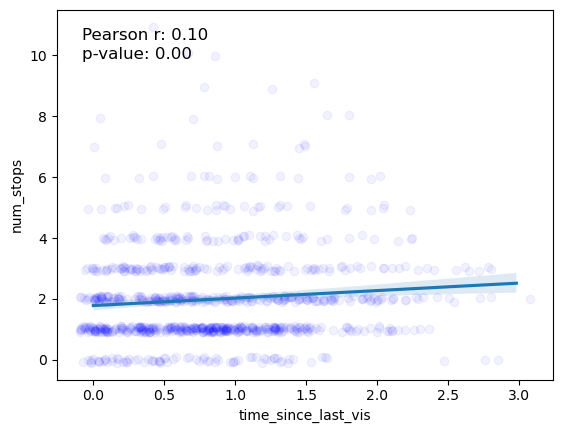

P-value for last_vis_dist and num_stops is 0.69001534035727. Plot skipped.
P-value for last_vis_cum_dist and num_stops is 0.5851631916549086. Plot skipped.
P-value for last_vis_ang and num_stops is 0.6810289317621921. Plot skipped.
P-value for last_vis_ang_to_bndry and num_stops is 0.49641150620449725. Plot skipped.


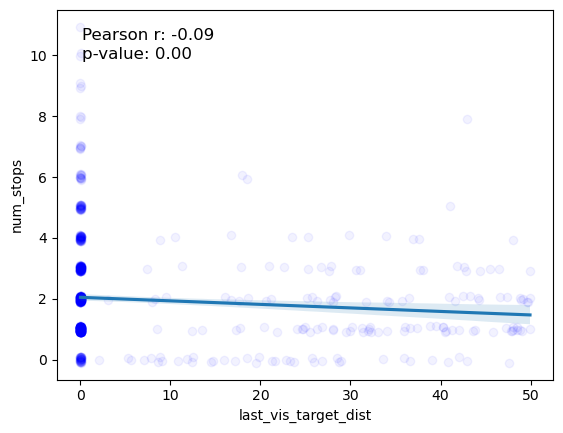

P-value for last_vis_target_ang and num_stops is 0.42826644483799226. Plot skipped.
P-value for last_vis_target_ang_to_bndry and num_stops is 0.9412500167985187. Plot skipped.
P-value for abs_last_vis_ang and num_stops is 0.22658410018561367. Plot skipped.
P-value for abs_last_vis_ang_to_bndry and num_stops is 0.29512220898920855. Plot skipped.
P-value for abs_last_vis_target_ang and num_stops is 0.15241840546991084. Plot skipped.
P-value for abs_last_vis_target_ang_to_bndry and num_stops is 0.08523346603942086. Plot skipped.


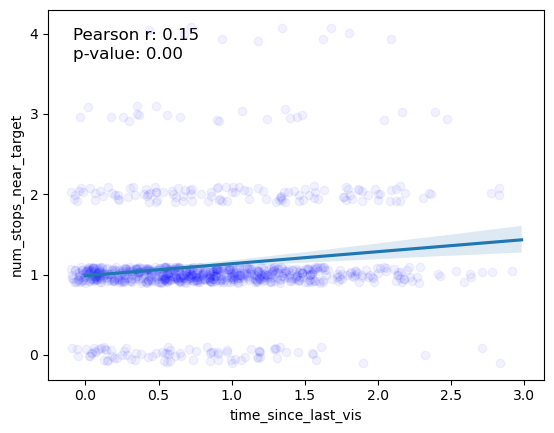

P-value for last_vis_dist and num_stops_near_target is 0.05086370151275266. Plot skipped.
P-value for last_vis_cum_dist and num_stops_near_target is 0.055226063825271766. Plot skipped.
P-value for last_vis_ang and num_stops_near_target is 0.15177867751530782. Plot skipped.
P-value for last_vis_ang_to_bndry and num_stops_near_target is 0.36966989985616605. Plot skipped.


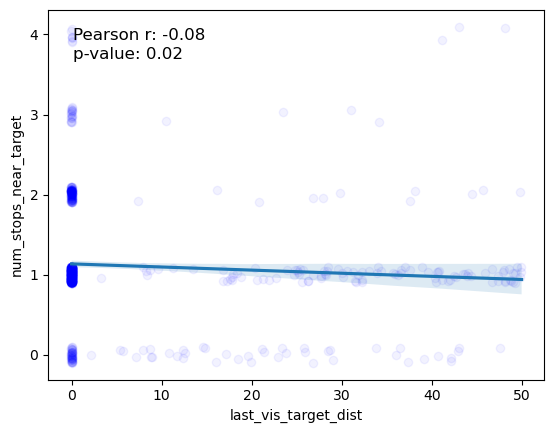

P-value for last_vis_target_ang and num_stops_near_target is 0.5965083494001258. Plot skipped.
P-value for last_vis_target_ang_to_bndry and num_stops_near_target is 0.736095352131408. Plot skipped.
P-value for abs_last_vis_ang and num_stops_near_target is 0.0697146892560438. Plot skipped.
P-value for abs_last_vis_ang_to_bndry and num_stops_near_target is 0.12369627745500746. Plot skipped.


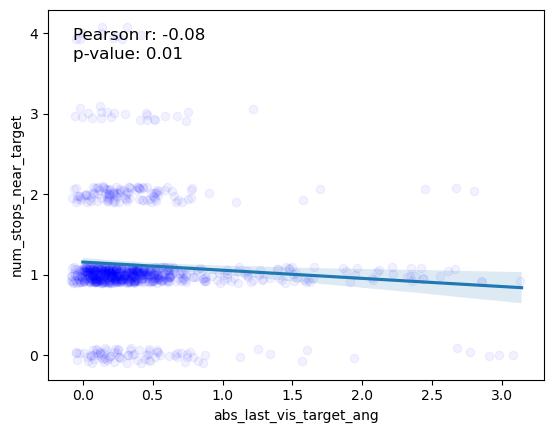

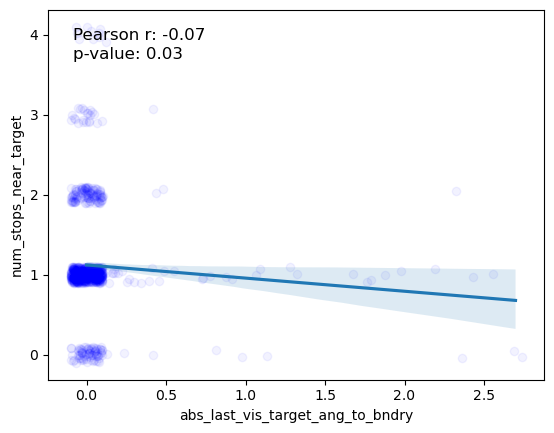

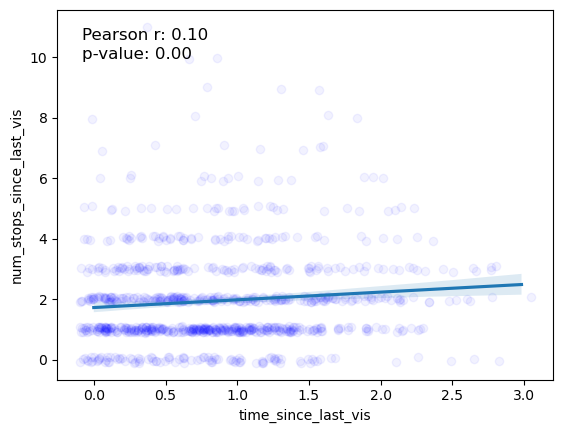

P-value for last_vis_dist and num_stops_since_last_vis is 0.7945813731536799. Plot skipped.
P-value for last_vis_cum_dist and num_stops_since_last_vis is 0.7922368048201222. Plot skipped.
P-value for last_vis_ang and num_stops_since_last_vis is 0.5854620822610634. Plot skipped.
P-value for last_vis_ang_to_bndry and num_stops_since_last_vis is 0.44210267703463424. Plot skipped.


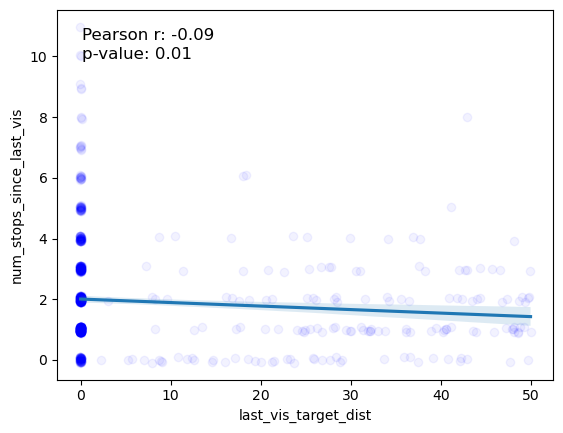

P-value for last_vis_target_ang and num_stops_since_last_vis is 0.3945157998423955. Plot skipped.
P-value for last_vis_target_ang_to_bndry and num_stops_since_last_vis is 0.9080791742666385. Plot skipped.
P-value for abs_last_vis_ang and num_stops_since_last_vis is 0.3690095627487782. Plot skipped.
P-value for abs_last_vis_ang_to_bndry and num_stops_since_last_vis is 0.5751371839260887. Plot skipped.
P-value for abs_last_vis_target_ang and num_stops_since_last_vis is 0.20792134367218326. Plot skipped.
P-value for abs_last_vis_target_ang_to_bndry and num_stops_since_last_vis is 0.07237554191452453. Plot skipped.


In [13]:
plot_relationships_between_last_seen_info_and_num_stops(target_clust_last_vis_df)

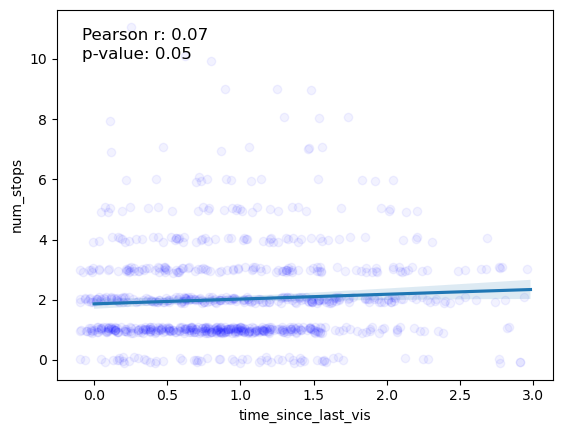

P-value for last_vis_dist and num_stops is 0.13546384155810856. Plot skipped.
P-value for last_vis_cum_dist and num_stops is 0.0999042826547412. Plot skipped.
P-value for last_vis_ang and num_stops is 0.46188114811366354. Plot skipped.
P-value for last_vis_ang_to_bndry and num_stops is 0.2738221575052914. Plot skipped.
last_vis_target_dist not in the dataframe
last_vis_target_ang not in the dataframe
last_vis_target_ang_to_bndry not in the dataframe
P-value for abs_last_vis_ang and num_stops is 0.5796246191246002. Plot skipped.
P-value for abs_last_vis_ang_to_bndry and num_stops is 0.526408865724241. Plot skipped.
abs_last_vis_target_ang not in the dataframe
abs_last_vis_target_ang_to_bndry not in the dataframe


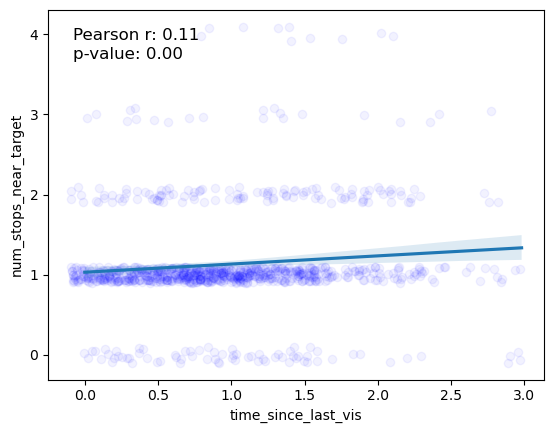

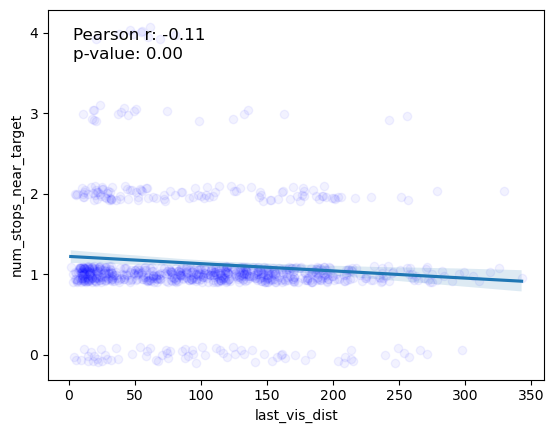

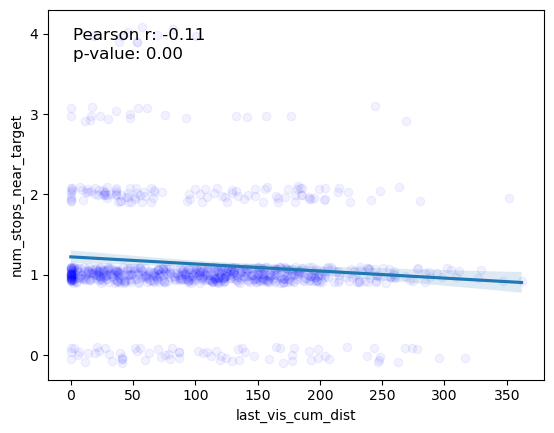

P-value for last_vis_ang and num_stops_near_target is 0.342402904810322. Plot skipped.
P-value for last_vis_ang_to_bndry and num_stops_near_target is 0.6548386924173738. Plot skipped.
last_vis_target_dist not in the dataframe
last_vis_target_ang not in the dataframe
last_vis_target_ang_to_bndry not in the dataframe
P-value for abs_last_vis_ang and num_stops_near_target is 0.10477040897964593. Plot skipped.


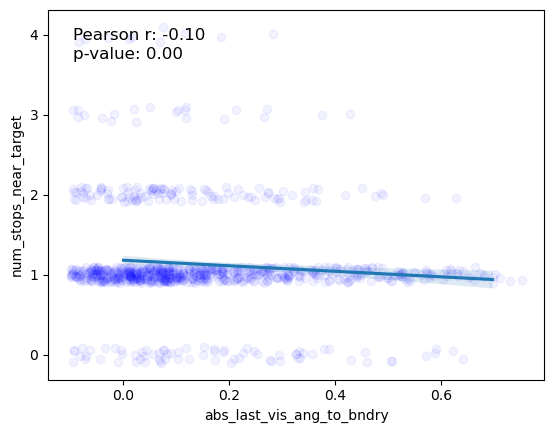

abs_last_vis_target_ang not in the dataframe
abs_last_vis_target_ang_to_bndry not in the dataframe


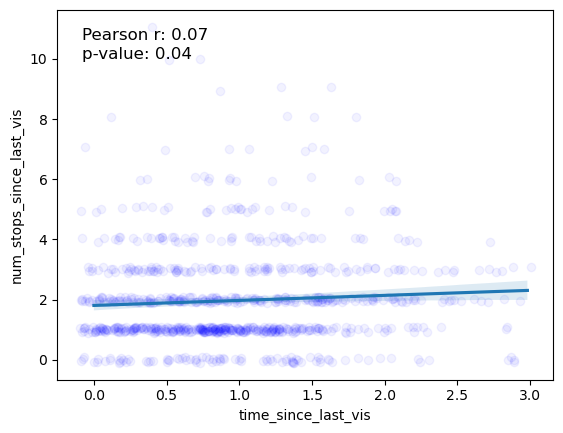

P-value for last_vis_dist and num_stops_since_last_vis is 0.19842341611485576. Plot skipped.
P-value for last_vis_cum_dist and num_stops_since_last_vis is 0.16843633274180791. Plot skipped.
P-value for last_vis_ang and num_stops_since_last_vis is 0.36863229226394667. Plot skipped.
P-value for last_vis_ang_to_bndry and num_stops_since_last_vis is 0.23528247140619976. Plot skipped.
last_vis_target_dist not in the dataframe
last_vis_target_ang not in the dataframe
last_vis_target_ang_to_bndry not in the dataframe
P-value for abs_last_vis_ang and num_stops_since_last_vis is 0.744637795637478. Plot skipped.
P-value for abs_last_vis_ang_to_bndry and num_stops_since_last_vis is 0.8104823694843497. Plot skipped.
abs_last_vis_target_ang not in the dataframe
abs_last_vis_target_ang_to_bndry not in the dataframe


In [14]:
plot_relationships_between_last_seen_info_and_num_stops(target_last_vis_df)

# New GUAT/TAFT frequency

In [ ]:
gc_kwargs = GUAT_vs_TAFT_class.gc_kwargs
gcc = GUAT_collect_info_class.GUATCollectInfoForSession(raw_data_folder_path=raw_data_folder_path, 
                                                        gc_kwargs=gc_kwargs, 
                                                        new_point_index_start=0)
gcc.get_monkey_data(already_retrieved_ok=True, include_TAFT_data=True)
gcc.make_or_retrieve_GUAT_w_ff_df(exists_ok=True)
GUAT_w_ff_df = gcc.GUAT_w_ff_df.copy()

Retrieved monkey data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/monkey_information.csv  and ff data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_basic_info.npz
Retrieved ff_dataframe from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_dataframe.h5
Retrieved GUAT_w_ff_df


In [ ]:
gcc.data_item.TAFT_trials_df['ff_capture_time'] = gcc.data_item.ff_caught_T_new[gcc.data_item.TAFT_trials_df['trial']]

In [ ]:
gcc.data_item.TAFT_trials_df['last_stop_time'] - gcc.data_item.TAFT_trials_df['ff_capture_time']

0     -0.00000
1      0.07650
2      0.05962
3      0.07626
4      0.06345
        ...   
269    0.09326
270    0.10981
271    0.09361
272    0.11628
273    0.12503
Length: 274, dtype: float64

In [ ]:
GUAT_item = process_GUAT_trials_class.ProcessGUATtrials(data_item.give_up_after_trying_info_bundle, \
                                                        data_item.PlotTrials_args, max_distance_to_stop_for_GUAT_target=50, max_allowed_time_since_last_vis=2.5)
GUAT_item.find_possible_objects_of_pursuit_in_GUAT()
# GUAT_item.find_GUAT_ff_aimed_at_from_manual_anno(pseudo_manual_anno)
# GUAT_item.check_GUAT_object_with_manual_anno(verbose=False)
#GUAT_item.inspect_clusters_w_o_matching_ff()
GUAT_item.make_GUAT_cluster_df()

Finding information of clusters ...
0 out of 103
100 out of 103


# Compare target with non_target

In [ ]:
# Both target and non-target are either visible or in memory
plot_statistics.compare_target_with_non_targets(data_item.ff_dataframe, var_of_interest='ff_angle')
plot_statistics.compare_target_with_non_targets(data_item.ff_dataframe, var_of_interest='ff_angle_boundary')
plot_statistics.compare_target_with_non_targets(data_item.ff_dataframe, var_of_interest='ff_distance')

In [ ]:
# Both target and non-target are visible
ff_dataframe_subset = data_item.ff_dataframe[data_item.ff_dataframe['visible']==1]
plot_statistics.compare_target_with_non_targets(ff_dataframe_subset, var_of_interest='ff_angle')
plot_statistics.compare_target_with_non_targets(ff_dataframe_subset, var_of_interest='ff_angle_boundary')
plot_statistics.compare_target_with_non_targets(ff_dataframe_subset, var_of_interest='ff_distance')

# Are angles to fireflies decreasing?

## plot trials

In [ ]:
trial_total_num = 10
data_item.cluster_around_target_trials, data_item.cluster_around_target_indices, data_item.cluster_around_target_positions = pattern_by_trials.cluster_around_target_func(data_item.ff_dataframe, 
        data_item.caught_ff_num, data_item.ff_caught_T_new, data_item.ff_real_position_sorted, max_time_apart=1.25)

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}
data_item.PlotTrials_args = (data_item.monkey_information, data_item.ff_dataframe, data_item.ff_life_sorted, data_item.ff_real_position_sorted, data_item.ff_believed_position_sorted, data_item.cluster_around_target_indices, data_item.ff_caught_T_new)

In [ ]:

num_trials = 2 


with basic_func.initiate_plot(10,10,100):
  for currentTrial in [102]: #two_in_a_row[10:20]:
      duration = [data_item.ff_caught_T_new[currentTrial-num_trials], data_item.ff_caught_T_new[currentTrial]]
      plot_trials.PlotTrials(duration, 
                  *data_item.PlotTrials_args,
                  **classic_plot_kwargs,
                  currentTrial = currentTrial,
                  num_trials = num_trials,                   
                  show_connect_path_ff_except_targets = True,
                  show_path_when_target_visible = True,
                  show_ff_indices = False,
                  hitting_arena_edge_ok = True,
                  visible_distance = 400,
                  minimal_margin = 300,
                  show_monkey_angles = True
                  )
      plt.show()  

      

## Plot: abs_ffangle_decreasing (angle or angle to boundary?)

In [ ]:
trial_numbers = range(100, 105)
plot_behaviors_utils.plot_change_in_ff_angle(data_item.ff_dataframe, trial_numbers, var_of_interest = "abs_ffangle_decreasing")
plot_behaviors_utils.plot_change_in_ff_angle(data_item.ff_dataframe, trial_numbers, var_of_interest = "abs_ffangle_boundary_decreasing")
plot_behaviors_utils.plot_change_in_ff_angle(data_item.ff_dataframe, trial_numbers, var_of_interest = "dw_same_sign_as_ffangle")
plot_behaviors_utils.plot_change_in_ff_angle(data_item.ff_dataframe, trial_numbers, var_of_interest = "dw_same_sign_as_ffangle_boundary")

# ^Appendix^

# New two in a row

## New two-in-a-row (no speed up in the middle)

**If two fireflies were caught in the same chunk**

In [ ]:
from data_wrangling import more_data_wrangling_func
chunk_numbers, new_chunk_indices = more_data_wrangling_func.reorganize_data_into_chunks(data_item.monkey_information)

In [ ]:
new_chunk_start_times = data_item.monkey_information['monkey_t'][new_chunk_indices].values
ff_caught_T_chunk_numbers = np.digitize(data_item.ff_caught_T_new, new_chunk_start_times)
# find the trials where at least two fireflies were caught during the same chunk
two_in_a_row_trials_by_chunk = np.where(np.diff(ff_caught_T_chunk_numbers)==0)[0]+1

In [ ]:
category = two_in_a_row_trials_by_chunk
trial_total_num = 5
PlotTrials_args = (data_item.monkey_information, data_item.ff_dataframe, data_item.ff_life_sorted, data_item.ff_real_position_sorted, 
                   data_item.ff_believed_position_sorted, data_item.cluster_around_target_indices, data_item.ff_caught_T_new)
PlotTrials_kwargs = {'player': 'monkey',
                     'images_dir': None} 

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}

#category = two_in_a_row_simuly
#category = two_in_a_row_non_simul
#category = used_cluster  --> two_in_a_row_non_simul ^ on_before_last_one

num_trials = 2 

if len(category) > 0:
  with basic_func.initiate_plot(7,7,100):
    for currentTrial in category[:trial_total_num]:
        duration = [data_item.ff_caught_T_new[currentTrial-num_trials], 
                    data_item.ff_caught_T_new[currentTrial]]
        print(duration)
        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials,                   
                   show_connect_path_ff_except_targets = True,
                   show_path_when_target_visible = True,
                   )
        plt.show()  
        

## New two-in-a-row (no stop in the middle)


In [ ]:
# import LA
from numpy import linalg as LA


In [ ]:
monkey_information = data_item.monkey_information.copy()
monkey_information['trials'] = np.digitize(monkey_information['monkey_t'], data_item.ff_caught_T_new)
all_trials = monkey_information.trials.unique()
# take out all the rows where the monkey stops
speed_threshold = 5
monkey_info_subset = monkey_information[monkey_information['monkey_speed'] < speed_threshold].copy()

# if a stop is within 25 cm of the previous or the current target, then it doesn't count
monkey_info_subset['target_x'] = data_item.ff_real_position_sorted[monkey_info_subset['trials']][:,0]
monkey_info_subset['target_y'] = data_item.ff_real_position_sorted[monkey_info_subset['trials']][:,1]
monkey_info_subset['prev_target_x'] = data_item.ff_real_position_sorted[monkey_info_subset['trials']-1][:,0]
monkey_info_subset['prev_target_y'] = data_item.ff_real_position_sorted[monkey_info_subset['trials']-1][:,1]
monkey_info_subset['distance_to_target'] = LA.norm(monkey_info_subset[['monkey_x', 'monkey_y']].values - monkey_info_subset[['target_x', 'target_y']].values, axis=1)
monkey_info_subset['distance_to_prev_target'] = LA.norm(monkey_info_subset[['monkey_x', 'monkey_y']].values - monkey_info_subset[['prev_target_x', 'prev_target_y']].values, axis=1)
monkey_info_subset2 = monkey_info_subset[(monkey_info_subset['distance_to_target'] > 25) &
                                         (monkey_info_subset['distance_to_prev_target'] > 25)]
trials_containing_stops_in_middle = monkey_info_subset2.trials.unique()
two_in_a_row_trials_by_stops = np.setdiff1d(all_trials, trials_containing_stops_in_middle)                                         

In [ ]:
category = two_in_a_row_trials_by_stops
trial_total_num = 10
PlotTrials_kwargs = {'player': 'monkey',
                     'images_dir': None} 

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}

#category = two_in_a_row_simuly
#category = two_in_a_row_non_simul
#category = used_cluster  --> two_in_a_row_non_simul ^ on_before_last_one

num_trials = 2 

if len(category) > 0:
  with basic_func.initiate_plot(7,7,100):
    for currentTrial in category[:trial_total_num]:
        duration = [data_item.ff_caught_T_new[currentTrial-num_trials], data_item.ff_caught_T_new[currentTrial]]
        print(duration)
        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials, 
                   trail_color_var = 'speed',                  
                   show_connect_path_ff_except_targets = True,
                   show_path_when_target_visible = False,
                   )
        plt.show()  
        

# monkey_information vs. signal_df

In [ ]:
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/individual_monkey_data/monkey_Bruno/data_0221"
# interocular_dist = 4 # 4 for Bruno and 3 for others
# monkey_information, ff_caught_T_new, ff_index_sorted, ff_real_position_sorted, ff_believed_position_sorted, ff_life_sorted, ff_flash_sorted, ff_flash_end_sorted \
#                 = process_raw_data.log_extractor(raw_data_folder_path = raw_data_folder_path).extract_data(monkey_information_exists_OK = True, interocular_dist=interocular_dist)

# accurate_start_time, accurate_end_time, signal_df = process_raw_data.find_start_and_accurate_end_time(raw_data_folder_path, exists_ok=True, return_signal_df=True)
# signal_t = np.array(signal_df.Time)
# monkey_t = monkey_information['monkey_t'].values
# time_bins = process_raw_data.find_time_bins_for_an_array(monkey_t)

# # add time_box to monkey_information
# monkey_information.loc[:, 'time_box'] = np.arange(1, len(monkey_information)+1)
# # group signal_df.time based on intervals in monkey_information['monkey_t'], thus adding the column time_box to signal_df
# signal_df.loc[:, 'time_box'] = np.digitize(signal_t, time_bins)

## Compare linear speed and angular from monkey_information and signal_df respectively

In [ ]:
# variables_to_add = ['LateralV', 'ForwardV', 'AngularV']
# process_raw_data.add_smr_file_info_to_monkey_information(monkey_information, raw_data_folder_path, variables = variables_to_add)
# monkey_information['monkey_linear_v'] = LA.norm(monkey_information[['LateralV', 'ForwardV']].values, axis=1)

In [ ]:
# fig, axes = plt.subplots(figsize=(15, 7))
# start = 20000
# num_points = 30
# #shared_x = monkey_information['monkey_t'].values[start:start+num_points]
# shared_x = np.arange(num_points)
# axes.plot(shared_x, monkey_information['monkey_linear_v'].values[start:start+num_points], color='slateblue', alpha=0.6)
# axes.plot(shared_x, monkey_information['monkey_speed'].values[start:start+num_points], color='orange', alpha=0.6)
# plt.show()

In [ ]:
# fig, axes = plt.subplots(figsize=(15, 7))
# start = 30000
# num_points = 100
# #shared_x = monkey_information['monkey_t'].values[start:start+num_points]
# shared_x = np.arange(num_points)
# axes.plot(shared_x, monkey_information['AngularV'].values[start:start+num_points], color='slateblue', alpha=0.6)
# axes.plot(shared_x, monkey_information['abs_monkey_dw'].values[start:start+num_points]*180/pi, color='orange', alpha=0.6)
# plt.show()

## Compare time_boxes

In [ ]:
# monkey_subset = monkey_information[['monkey_t', 'time_box']]
# signal_subset = signal_df[['Time', 'time_box']]
# signal_subset[signal_subset['time_box']==1]

In [ ]:
# monkey_subset[monkey_subset['time_box']==1]

## Compare monkey_x and monkey_y from monkey_information and signal_df respectively

In [ ]:
# variables_to_add = ['MonkeyX', 'MonkeyY']
# process_raw_data.add_smr_file_info_to_monkey_information(monkey_information, raw_data_folder_path, variables = variables_to_add)

In [ ]:
# fig, axes = plt.subplots(figsize=(15, 7))
# start = 30000
# num_points = 50
# #shared_x = monkey_information['monkey_t'].values[start:start+num_points]
# shared_x = np.arange(num_points)
# axes.plot(shared_x, monkey_information['MonkeyX'].values[start:start+num_points], color='slateblue', alpha=0.6)
# axes.plot(shared_x, monkey_information['monkey_x'].values[start:start+num_points], color='orange', alpha=0.6)
# plt.show()

# See some Schro data

In [ ]:
# trial_total_num = 10
# data_item.cluster_around_target_trials, data_item.cluster_around_target_indices, data_item.cluster_around_target_positions = pattern_by_trials.cluster_around_target_func(data_item.ff_dataframe, 
#         data_item.caught_ff_num, data_item.ff_caught_T_new, data_item.ff_real_position_sorted, max_time_apart=1.25)

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}
data_item.PlotTrials_args = (data_item.monkey_information, data_item.ff_dataframe, data_item.ff_life_sorted, data_item.ff_real_position_sorted, data_item.ff_believed_position_sorted, data_item.cluster_around_target_indices, data_item.ff_caught_T_new)

In [ ]:

num_trials = 2 


with basic_func.initiate_plot(10,10,100):
  for start_time in range(3000, 4000, 100):
      
      plot_trials.PlotTrials([start_time, start_time+1], 
                  *data_item.PlotTrials_args,
                  **classic_plot_kwargs,
                  currentTrial = None,
                  num_trials = None,                   
                  show_connect_path_ff_except_targets = True,
                  show_path_when_target_visible = True,
                  show_ff_indices = False,
                  hitting_arena_edge_ok = True,
                  visible_distance = 400,
                  minimal_margin = 300,
                  show_monkey_angles = True
                  )
      plt.show()  

      

# Compare old and new distance array

In [ ]:
ff_caught_T_new = data_item.ff_caught_T_new
monkey_information = data_item.monkey_information
ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted


In [150]:
import numpy.linalg as LA

def old_find_stops_func(currentTrial, ff_caught_T_new, monkey_information, player = "monkey", return_index = False, 
                  since_target_last_seen = False, t_last_vis = None):

    if since_target_last_seen is True:
      duration = [ff_caught_T_new[currentTrial]-t_last_vis[currentTrial-1], ff_caught_T_new[currentTrial]]
    else:
      duration = [ff_caught_T_new[currentTrial-1], ff_caught_T_new[currentTrial]]
    
    cum_iloc_indices = np.where((monkey_information['monkey_t'] > duration[0]) & (monkey_information['monkey_t'] <= duration[1]))[0]
    if len(cum_iloc_indices) > 5:
      cum_mx, cum_my = np.array(monkey_information['monkey_x'].iloc[cum_iloc_indices]), np.array(monkey_information['monkey_y'].iloc[cum_iloc_indices])
      cum_speeddummy = np.array(monkey_information['monkey_speeddummy'].iloc[cum_iloc_indices])
      # if the monkey has stopped at any point
      zerospeed_index = np.where(cum_speeddummy==0)[0]
      if len(zerospeed_index) > 0 :
        zerospeedx, zerospeedy = cum_mx[zerospeed_index], cum_my[zerospeed_index]
        zerospeedindex = cum_iloc_indices[zerospeed_index]
        # Get pairs of x, y coordinates of all the stops
        stop0 = np.array(list(zip(zerospeedx, zerospeedy)))
        # Get the locations indexes of unique stops
        _, stops_index = np.unique(stop0, axis=0, return_index=True)
        stops = stop0[stops_index[np.argsort(stops_index)]]
        stop_indices = zerospeedindex[stops_index[np.argsort(stops_index)]]
        # If player is monkey;
        if player == "monkey":
        # Find distinct stops from unique stops: two stops are considered distinct here if they are at least 5 cm apart; 
        # this number is an arbitrary but sensible choice.
          if return_index is True:
            distinct_stops = [stop_indices[0]] + [stop_indices[i+1] for i in range(len(stops)-1) if LA.norm(np.array((stops[i+1][0]-stops[i][0], stops[i+1][1]-stops[i][1]))) > 10]
          else:
            distinct_stops = [stops[0]] + [stops[i+1] for i in range(len(stops)-1) if LA.norm(np.array((stops[i+1][0]-stops[i][0], stops[i+1][1]-stops[i][1]))) > 10]
        else: # else the player is agent
          if return_index is True:
            distinct_stops = zerospeedindex[stops_index[np.argsort(stops_index)]]
          else:
            distinct_stops = stops
      else:
        # if there is no stop, then return an empty list
        distinct_stops = []
    else:
      # if there is no step in the current trial (this can happen if the monkey captures two fireflies together), then return an empty list
      distinct_stops = []
    return distinct_stops



In [151]:
cum_distance_array = []
distance_array = []
num_stops_array = []
for i in range(len(ff_caught_T_new)-1):
  cum_distance_array.append(basic_func.get_cum_distance_traveled(i, ff_caught_T_new, monkey_information))
  distance_array.append(basic_func.get_distance_between_two_points(i, ff_caught_T_new, monkey_information, ff_believed_position_sorted))
  num_stops_array.append(len(old_find_stops_func(i, ff_caught_T_new, monkey_information)))
cum_distance_array = np.array(cum_distance_array)
distance_array = np.array(distance_array)
num_stops_array = np.array(num_stops_array)

old_cum_distance_array = cum_distance_array.copy()
old_distance_array = distance_array.copy()
old_num_stops_array = num_stops_array.copy()

In [283]:
# also get the new cum_distance_array, distance_array, and num_stops_array
cum_distance_array = []
distance_array = []
for i in range(len(data_item.ff_caught_T_new)-1):
  cum_distance_array.append(basic_func.get_cum_distance_traveled(i, data_item.ff_caught_T_new, data_item.monkey_information))
  distance_array.append(basic_func.get_distance_between_two_points(i, data_item.ff_caught_T_new, data_item.monkey_information, data_item.ff_believed_position_sorted))
cum_distance_array = np.array(cum_distance_array)
distance_array = np.array(distance_array)

num_stops_array = organize_patterns_and_features.get_num_stops_array(data_item.monkey_information, np.arange(len(data_item.ff_caught_T_new)))
num_stops_array = num_stops_array[:len(cum_distance_array)]

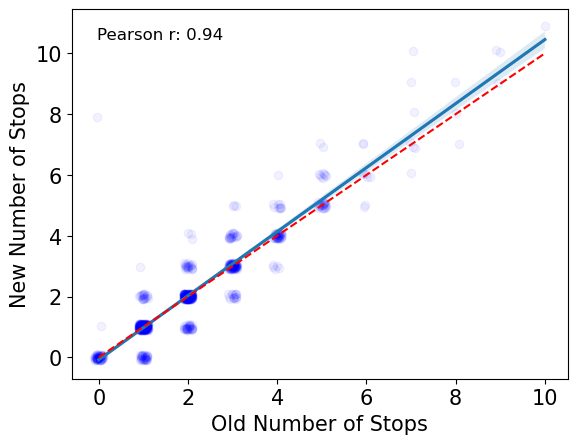

In [284]:
from scipy.stats import pearsonr
sns.regplot(x=old_num_stops_array, y=num_stops_array, scatter_kws={'color': 'blue', 'alpha': 0.05},
            x_jitter=0.1, y_jitter=0.1)
r, _ = pearsonr(old_num_stops_array, num_stops_array)
# Annotate the plot with the Pearson correlation coefficient
plt.annotate(f'Pearson r: {r:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')


# plot a line of y=x
plt.plot([0, 10], [0, 10], color='red', linestyle='--')
plt.xlabel('Old Number of Stops')
plt.ylabel('New Number of Stops')
plt.show()

# Should I change stop criterion?

In [271]:
data_item = monkey_data_classes.ProcessMonkeyData(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
# data_item.find_patterns()
# data_item.make_PlotTrials_args()

Retrieved monkey data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/monkey_information.csv  and ff data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_basic_info.npz
Retrieved ff_dataframe from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0314/ff_dataframe.h5


In [424]:
data_item.find_patterns()

412 clusters out of 549 are too close to the target or the last target
The number of new trials that are used to separate stop clusters is 953


In [ ]:
ff_caught_T_new = data_item.ff_caught_T_new
monkey_information = data_item.monkey_information
ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted

In [ ]:
monkey_information['monkey_speed'].max()

200.0

In [ ]:
monkey_information['monkey_dw'].max()

1.5731023009150584

In [158]:
closest_stop_to_capture_df = alt_ff_utils.get_closest_stop_time_to_all_capture_time(ff_caught_T_new, monkey_information, ff_real_position_sorted, stop_ff_index_array=np.arange(len(ff_caught_T_new)))
ff_dataframe_visible = data_item.ff_dataframe[data_item.ff_dataframe['visible'] == 1]
closest_stop_to_capture_df = monkey_landing_in_ff.add_distance_from_ff_to_stop(closest_stop_to_capture_df, monkey_information, ff_real_position_sorted)
original_length = len(closest_stop_to_capture_df)
outlier_sub_df = closest_stop_to_capture_df[closest_stop_to_capture_df['distance_from_ff_to_stop'] > 25].sort_values(by='distance_from_ff_to_stop', ascending=False)
closest_stop_to_capture_df = closest_stop_to_capture_df[closest_stop_to_capture_df['distance_from_ff_to_stop'] <= 25].copy()

print(f'{original_length - len(closest_stop_to_capture_df)} rows out of {original_length} rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, ' +
        f'\n which is {round((original_length - len(closest_stop_to_capture_df))/original_length*100, 2)}% of the rows, ' + 
        f'and the sorted distances from those are {outlier_sub_df["distance_from_ff_to_stop"].values}')


61 rows out of 953 rows were removed from all_closest_point_to_capture_df because the distance between stop and ff center is larger than 25cm, 
 which is 6.4% of the rows, and the sorted distances from those are [802.31739941 614.76153246 513.18910618 445.95343978 414.64106108
 189.62842519 122.21112227  74.04968925  41.22372358  40.19808499
  39.54808788  38.80115662  37.61171564  35.61437552  34.48571715
  34.3504722   34.2894841   34.06738361  33.85914003  33.64709154
  33.46457194  33.46442714  33.08540303  32.45649819  30.96024576
  30.53881836  30.4477919   30.38240491  29.84621105  29.26043342
  29.24950357  28.74889325  28.46726625  28.23970138  28.1866198
  28.08317402  28.00019998  27.88098264  27.65708821  27.32693121
  27.2956792   27.21541058  27.08278078  26.87290155  26.84637383
  26.53935947  26.48652794  26.31052631  26.21366067  26.02652916
  25.96909618  25.96845643  25.79880881  25.75648057  25.73013381
  25.61727499  25.60923376  25.49382905  25.45351149  25.225425

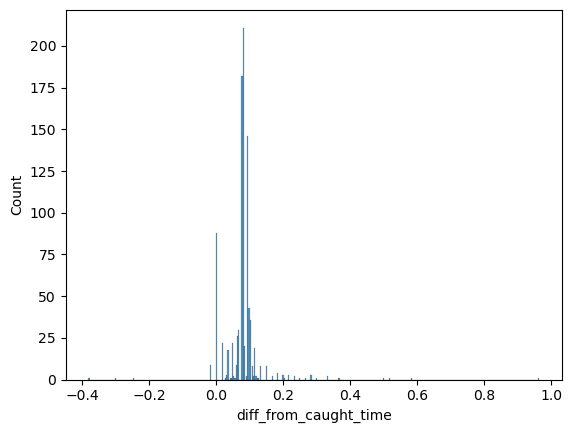

In [157]:
sns.histplot(closest_stop_to_capture_df['diff_from_caught_time'])
plt.show()

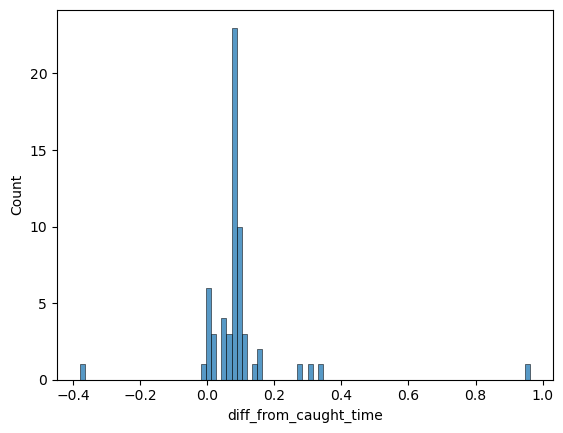

In [ ]:
sns.histplot(outlier_sub_df['diff_from_caught_time'])
plt.show()

In [ ]:
def get_monkey_speed_and_dw_in_target(row, monkey_information):
    monkey_sub = monkey_information[monkey_information['time'].between(row['caught_time']-0.2, row['caught_time']+0.2)].copy()
    monkey_sub['distance_to_ff'] = np.sqrt((monkey_sub['monkey_x'] - row['ff_x'])**2 + (monkey_sub['monkey_y'] - row['ff_y'])**2)
    monkey_sub = monkey_sub[monkey_sub['distance_to_ff'] < 25]
    return monkey_sub

In [ ]:
def plot_min_speed_and_abs_dw(all_min_speed, all_min_abs_dw):
    all_min_speed = np.array(all_min_speed)
    all_min_abs_dw = np.array(all_min_abs_dw)

    # plot min speed
    sns.histplot(all_min_speed, bins=100)
    plt.axvline(0.1, color='red', linestyle='--')
    plt.title('Minimum Speed')
    plt.show()
    # plot again, but limit the x axis
    sns.histplot(all_min_speed, bins=100, binrange=(0, 10))
    plt.axvline(0.1, color='red', linestyle='--')
    plt.title('Minimum Speed, limited x axis')
    plt.show()

    # plot min abs dw
    sns.histplot(all_min_abs_dw, bins=100)
    plt.axvline(0.0035, color='red', linestyle='--')
    plt.title('Min Abs Dw')
    plt.show()
    # plot again, but limit the x axis
    sns.histplot(all_min_abs_dw, bins=100, binrange=(0, 0.2))
    plt.axvline(0.0035, color='red', linestyle='--')
    plt.title('Min Abs Dw, limited x axis')
    plt.show()


In [ ]:
outlier_sub_df[['ff_x', 'ff_y']] = ff_real_position_sorted[outlier_sub_df['stop_ff_index'].values]
monkey_information['abs_monkey_dw'] = np.abs(monkey_information['monkey_dw'])

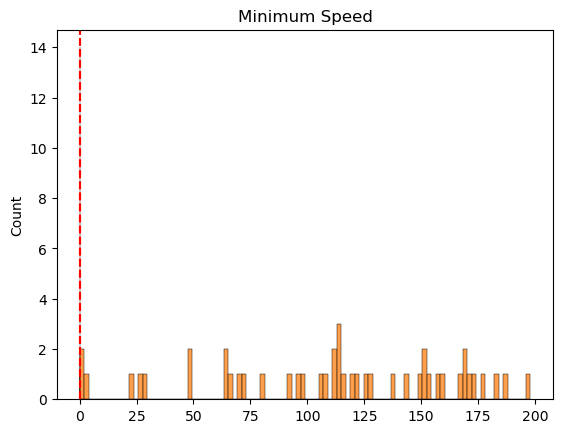

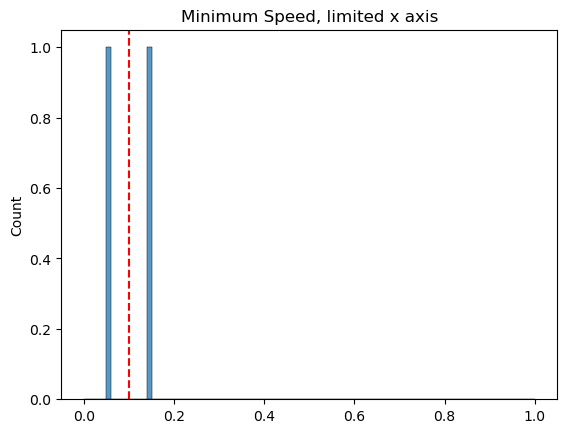

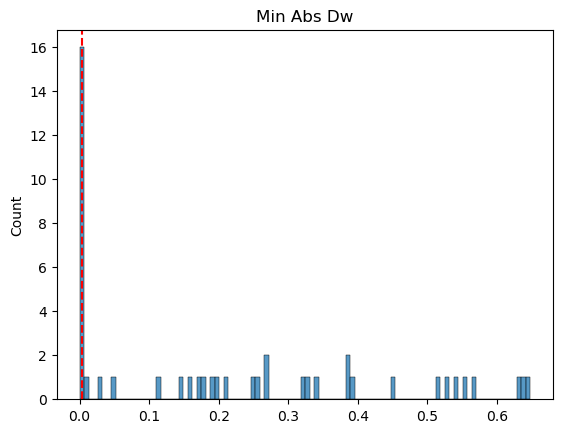

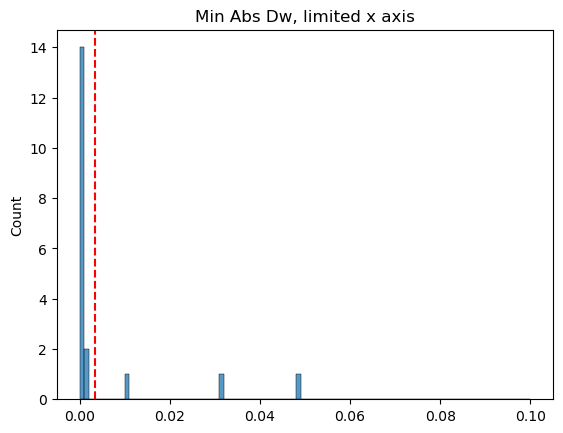

In [ ]:
# Plot the min speed and min abs dw
all_min_speed = []
all_min_abs_dw = []
for index, row in outlier_sub_df.iterrows():
    monkey_sub = get_monkey_speed_and_dw_in_target(row, monkey_information)
    min_speed = monkey_sub['monkey_speed'].min()
    min_dw = monkey_sub['abs_monkey_dw'].min()
    all_min_speed.append(min_speed)
    all_min_abs_dw.append(min_dw)

plot_min_speed_and_abs_dw(all_min_speed, all_min_abs_dw)


No monkey data found for 51472
No monkey data found for 51472
No monkey data found for 8339
No monkey data found for 195543
No monkey data found for 134482
No monkey data found for 195543
No monkey data found for 136133
No monkey data found for 213779
No monkey data found for 106867
No monkey data found for 48618
No monkey data found for 26433
No monkey data found for 106937
No monkey data found for 210378
No monkey data found for 22383
No monkey data found for 136301


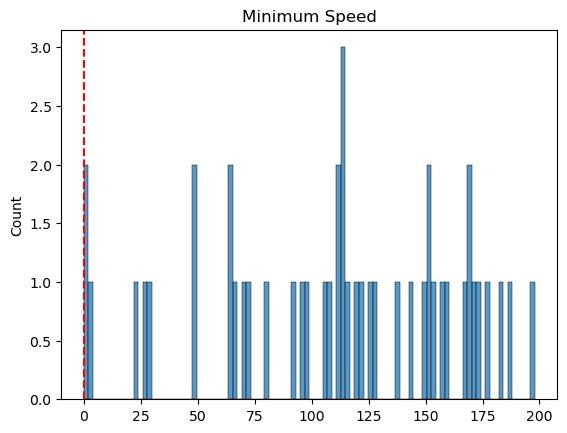

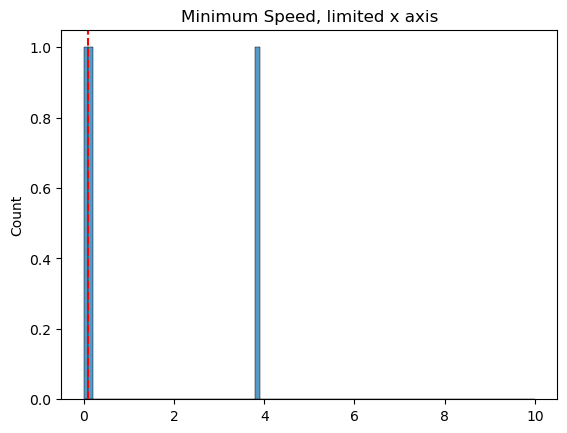

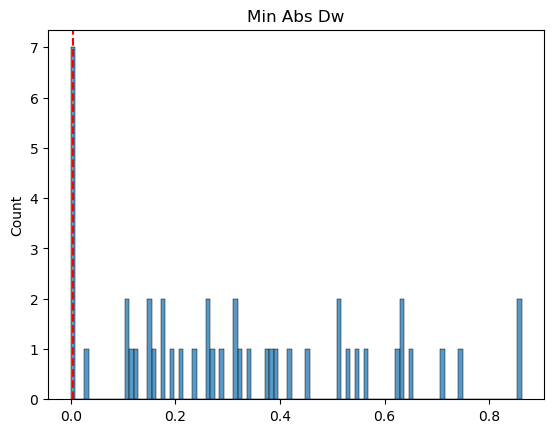

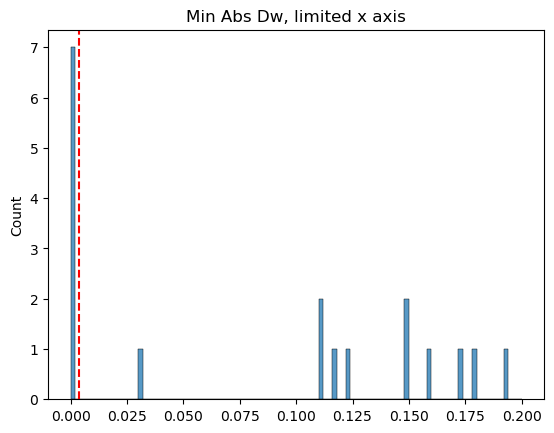

In [ ]:
# but i guess we would also want to know min speed and the *corresponding* min dw, and vice versa
all_min_speed = []
corr_dw = []
for index, row in outlier_sub_df.iterrows():
    monkey_sub = get_monkey_speed_and_dw_in_target(row, monkey_information)
    if len(monkey_sub) == 0:
        print(f'No monkey data found for {index}')
        continue
    min_speed = monkey_sub['monkey_speed'].min()
    all_min_speed.append(min_speed)
    corr_dw.append(monkey_sub[monkey_sub['monkey_speed'] == min_speed]['abs_monkey_dw'].values[0])
plot_min_speed_and_abs_dw(all_min_speed, corr_dw)

No monkey data found for 51472
No monkey data found for 51472
No monkey data found for 8339
No monkey data found for 195543
No monkey data found for 134482
No monkey data found for 195543
No monkey data found for 136133
No monkey data found for 213779
No monkey data found for 106867
No monkey data found for 48618
No monkey data found for 26433
No monkey data found for 106937
No monkey data found for 210378
No monkey data found for 22383
No monkey data found for 136301


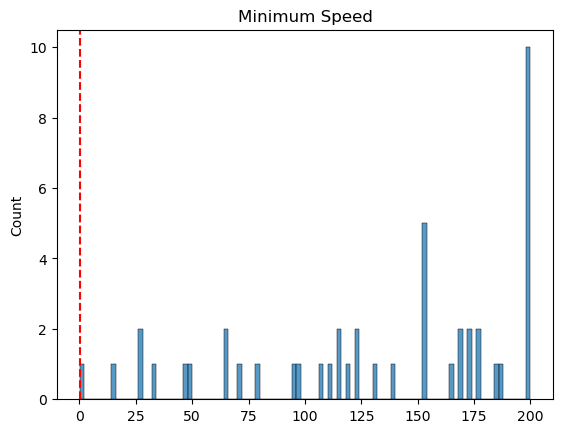

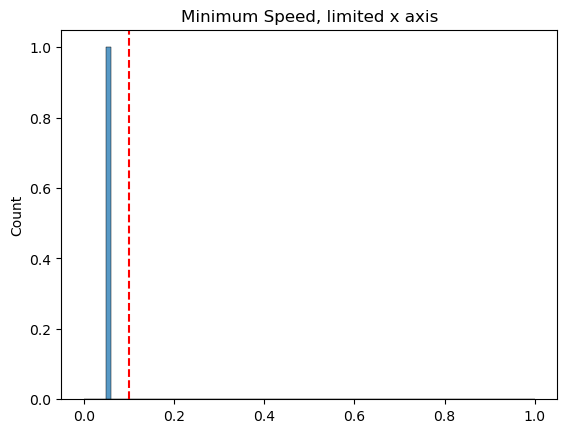

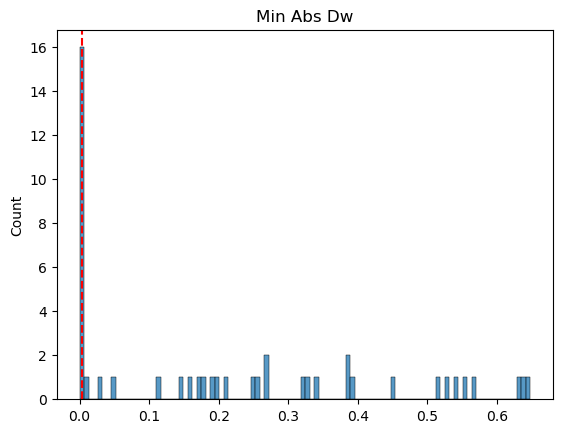

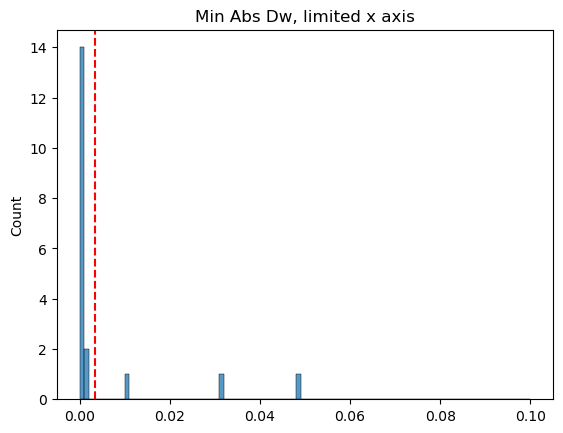

In [ ]:
# Lastly, we can also find the min abs dw and the corresponding speed
all_min_abs_dw = []
corr_speed = []
for index, row in outlier_sub_df.iterrows():
    monkey_sub = get_monkey_speed_and_dw_in_target(row, monkey_information)
    if len(monkey_sub) == 0:
        print(f'No monkey data found for {index}')
        continue
    min_dw = monkey_sub['abs_monkey_dw'].min()
    all_min_abs_dw.append(min_dw)
    corr_speed.append(monkey_sub[monkey_sub['abs_monkey_dw'] == min_dw]['monkey_speed'].values[0])
all_min_abs_dw = np.array(all_min_abs_dw)
corr_speed = np.array(corr_speed)
plot_min_speed_and_abs_dw(corr_speed, all_min_abs_dw)